### Fundamentals of Data Analysis Linear Regression Project 2021

#### Student Name: John Kavanagh
#### Lecturer Name: Ian McLoughlin
___

### Problem Statement

In this project you must perform and explain simple linear regression using Python on the powerproduction dataset available on Moodle. The goal is to accurately predict wind turbine power output from wind speed values using the data set as a basis.  

Your submission must be in the form of a git repository containing, at a minimum, the
following items:  
1. Jupyter notebook that performs simple linear regression on the data set.  
2. In that notebook, an explanation of your regression and an analysis of its accuracy.  
3. Standard items in a git repository such as a README.  

To enhance your submission, you might consider comparing simple linear regression to other types of regression on this data set. Rest assured, all the above concepts will be explored in lecture videos and other materials in the coming semester.  

___
### Software and Library Requirements

There are a number of software packages that will need to be installed in order to successfully analyse the dataset. 

1. Pandas
2. Seaborn
3. MatPlotLib
4. Numpy
5. SKLearn 
___

### Overview of File


### Overview of Linear Regression
### DataSet Analysis
#### Reading in the PowerProduction file
#### Initial Analysis of DataSet & Visualising the data
#### Least squares polynomial fit
#### Analysis of Linear Regression
### Progressing the DataSet
### Conclusion
### Bibliography


### Overview of Linear Regression


According to [Real Python](https://realpython.com/linear-regression-in-python/), Linear Regression is a subset of Regression analysis. Regression analysis itself provides for the creation or realisation of relationships in datasets where there is a single dependent and multiple independent variables. A simple example of this is modelling future sales for the year in a shop. There are multiple items that can be sold across a host of categories. These are the independent variables. The sales, the item that we are trying to predict, is the dependent variable. We are dependent on the sale of individual goods to account for the overall Sales.  

The importance of linear regression, according to [Real Python](https://realpython.com/linear-regression-in-python/), is the ease at which results can be interpreted.  

In a simple mathematical equation we can view linear regression via the regression formula: 

    Y = MX + C

Where:  
Y is the dependent variable. In order to determine it's value, we must also know what the variables m, x & c are.  
M is known as the slope of the equation.   
X is the independent variable. That is to say that it operates independetnly, and influences the dependent variable directly.   
C is the Y-intercept. It is referred to as this, because we can determine the value for Y when we say that x = zero.  

One of the more important aspects of this analysis will be taking a view of the coefficent of determination.This will allow us to determine the variance in Y and how much it is dependence on X.  

According to [Adi Bronshtein](https://towardsdatascience.com/simple-and-multiple-linear-regression-in-python-c928425168f9), a simple linear regression is a model based on data. From this position, we can derive the slope and intercept of the data, when we have the two variables spoken about in theprevious paragrpah, X & Y.  

X & Y represent, what [Tarun Gupta](https://towardsdatascience.com/simple-linear-regression-in-python-8cf596ac6a7c) refers to as the independent and dependent variables. That is, for a one unit change in the independent variable, x, there is a change of m units in Y. Independent variables will influence dependent variables in a linear regression scenario. The intended outcome is that we minimise the errors when attempting to predict a continuous variable, through the plotting of a 'line of best' according to the same author. 

___

**Tip: Outlier refers to an observation in a dataset that has very high or low value when compared to other observations  in the data.**  
Source: https://www.listendata.com/2018/03/regression-analysis.html
    
___

### DataSet Analysis

#### Reading in the PowerProduction file

in order to effectively read in the csv file from the URL, we need to import the pandas library. Pandas is an "open-source data manipulation tool" that can be leveraged for this linear regression exercise, as per the offical [Pandas](https://pandas.pydata.org/) site.

For further information on other material that pandas can facilitate: https://pandas.pydata.org/docs/user_guide/10min.html

In [51]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn import linear_model

In [52]:
dfPowerProd = pd.read_csv("https://raw.githubusercontent.com/ianmcloughlin/2020A-machstat-project/master/dataset/powerproduction.csv")

In [53]:
dfPowerProd

,speed,power
0,0.000,0.0
1,0.125,0.0
2,0.150,0.0
3,0.225,0.0
4,0.275,0.0
...,...,...
495,24.775,0.0
496,24.850,0.0
497,24.875,0.0
498,24.950,0.0


___

#### Initial Analysis of DataSet & Visualising the data

Now that we have the dataset in place, we can begin to isolate some of the features. 
We can run multiple high-level commands to begin to understand what we are delaing with. 

In [54]:
# Applying new styles and parameters for better readability.
plt.style.use("seaborn")
plt.rcParams["figure.figsize"] = (16,9)

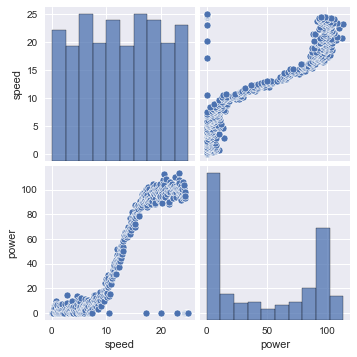

In [55]:
sns.pairplot(dfPowerProd);

In [56]:
dfPowerProd.describe()

,speed,power
count,500.000000,500.000000
mean,12.590398,48.014584
std,7.224991,41.614572
min,0.000000,0.000000
25%,6.324750,5.288000
50%,12.550500,41.645500
75%,18.775250,93.537000
max,25.000000,113.556000


In [57]:
dfPowerProd.info();

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   speed   500 non-null    float64
 1   power   500 non-null    float64
dtypes: float64(2)
memory usage: 7.9 KB


In [58]:
# Seperating the dataset and isolating the speed column
x = dfPowerProd.loc[:, 'speed']
x

0       0.000
1       0.125
2       0.150
3       0.225
4       0.275
        ...  
495    24.775
496    24.850
497    24.875
498    24.950
499    25.000
Name: speed, Length: 500, dtype: float64

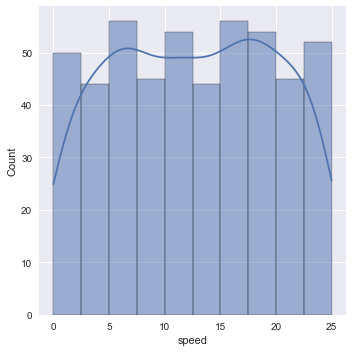

In [59]:
sns.displot(dfPowerProd["speed"], kde=True);

In [60]:
# Seperating the dataset and isolating the power column
y = dfPowerProd.loc[:, 'power']
y

0      0.0
1      0.0
2      0.0
3      0.0
4      0.0
      ... 
495    0.0
496    0.0
497    0.0
498    0.0
499    0.0
Name: power, Length: 500, dtype: float64

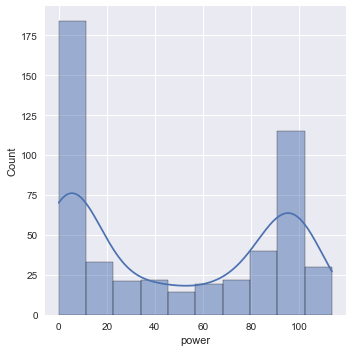

In [61]:
sns.displot(dfPowerProd["power"], kde=True);

If we isolate the variables that are in the dataset, and try to display a plot of the two, we stand a better chance of being able to understand the relationship. 

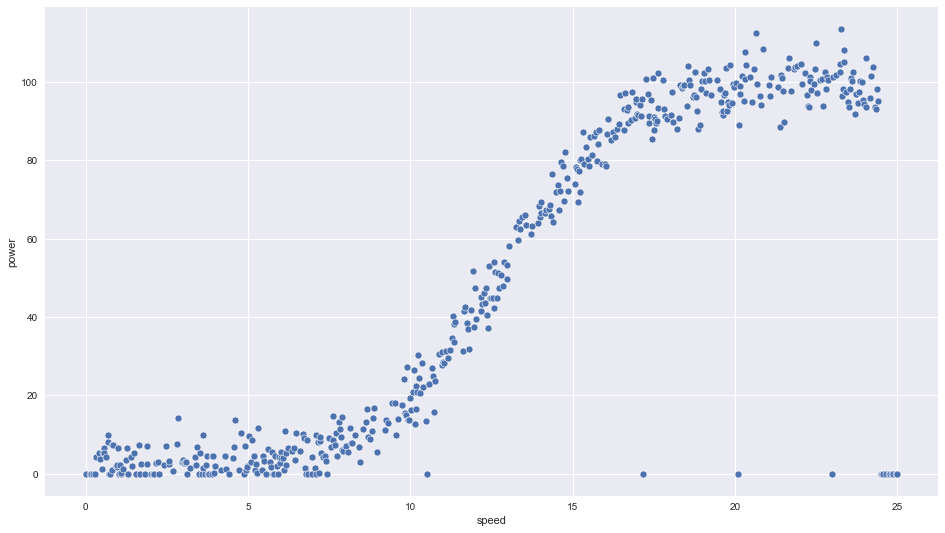

In [62]:
sns.scatterplot(data=dfPowerProd, x='speed', y='power');

___
**Tip: Multicollinearity occurs when there is high correlation between the independent variables.**  

Source: https://www.listendata.com/2018/03/regression-analysis.html
___

#### Least squares polynomial fit

There are two ways that we can determine the relationship of y and x. 

Firstly, we can run a command that leverages on the Numpy library. The function that the numpy package calls on is the PolyFit function.   

Secondly, we can also we use a slightly longer method that will leverage functionality eith the SKLearn library

#### Analysis of DataSet using Numpy

Numpy is apackage that allows for comprehensive mathematical functions, random number generators amonst a host of other operations to be performed with the Python package as per the official [Numpy.org](https://numpy.org/) site. 
Having imported the numpy library, there will be a function called, namely the [Polynomial](https://numpy.org/doc/stable/reference/generated/numpy.polyfit.html) function. This funcation has been specifically created in order to generate an ouput for the least squares polynomial fit.  

This expected outcome is a vector of coefficinets, that will minimise the squared error in the order, as per the same source.   

In [63]:
#We are going to assess the line to 1 degree of fitting the polynomial.
coeffs = np.polyfit(x, y, 1)
coeffs

array([  4.91759567, -13.89990263])

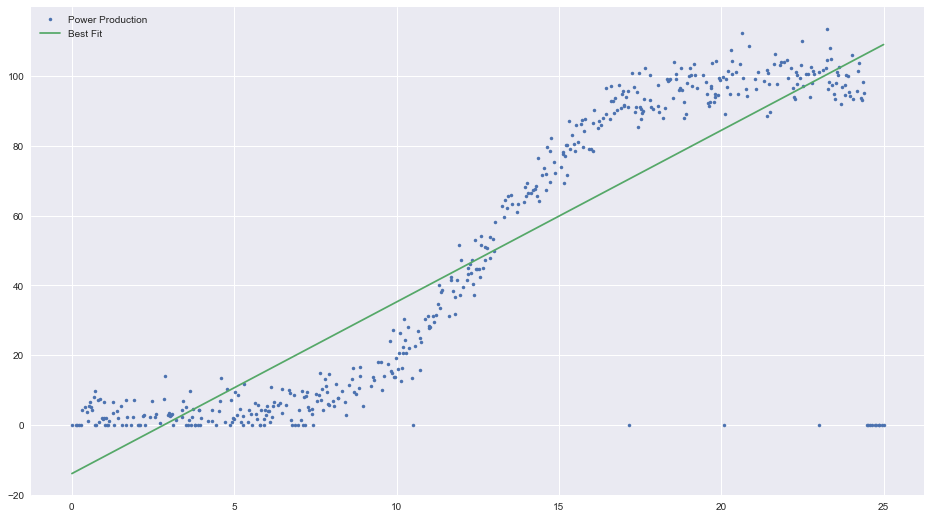

In [64]:
# Taking this values and using them to display a plot of the Line of Best Fit.
plt.plot(x, y, '.', label ='Power Production')
plt.plot(x, coeffs[0] * x + coeffs[1], '-', label='Best Fit')
plt.legend();

#### Analysis of DataSet using SKLearn

Adapted from the following articles:

Towards Science - Linear Regression in SKLearn  
https://towardsdatascience.com/simple-and-multiple-linear-regression-in-python-c928425168f9

Real Python - Simple Linear Regression With scikit-learn  
https://realpython.com/linear-regression-in-python/#implementing-linear-regression-in-python

In [65]:
df = pd.read_csv("https://raw.githubusercontent.com/ianmcloughlin/2020A-machstat-project/master/dataset/powerproduction.csv") 

In [66]:
# isolate the independent from the dependent variables.
v = pd.DataFrame(data=df, columns=["speed"])

In [67]:
w = pd.DataFrame(data=df, columns=["power"])

In [68]:
lm = linear_model.LinearRegression()
model = lm.fit(v, w)

In [69]:
predictions = lm.predict(v)
predictions[0:1]

array([[-13.89990263]])

In [70]:
lm.score(v, w)

0.7289360258564072

In [71]:
lm.coef_

array([[4.91759567]])

In [72]:
lm.intercept_

array([-13.89990263])

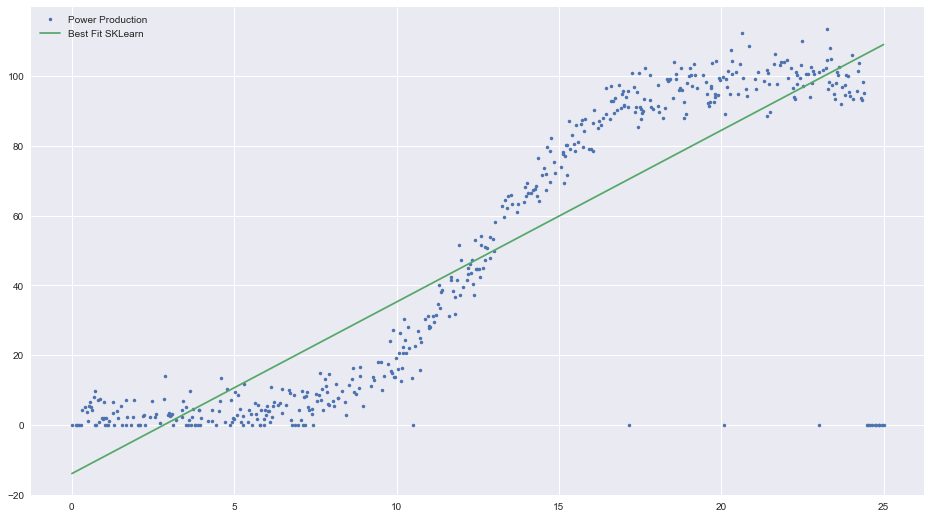

In [73]:
plt.plot(v, w, '.', label ='Power Production')
plt.plot(v, lm.coef_ * v + lm.intercept_, '-', label='Best Fit SKLearn')
plt.legend();

___
**Tool Tip: A statistical model or a machine learning algorithm is said to have underfitting when it cannot capture the underlying trend of the data.**
Source: https://www.geeksforgeeks.org/underfitting-and-overfitting-in-machine-learning/

___

#### Analysis of Linear Regression

Given that the analysis was started from the perspective that a striaght line would map onto the data, and now, having reviewed the plot, we can now state that this is not the case. This is an example of underfitting as per [Underfitting Article](https://www.geeksforgeeks.org/underfitting-and-overfitting-in-machine-learning/) on the geeksforgeeks site. Underfitting occurs when the line of best fit, does not capture the trend in the data.  

There is no pattern that can be traced bwteen the line and the curve of the data.  

There does not appear to be based on this observation that there is a linear relationship between the dependent and independent variable.

To review an example of an actual relationship, where the line of best fit maps onto the dataset better than the display seen above, please review the article by the [Towards AI team](https://medium.com/towards-artificial-intelligence/calculating-simple-linear-regression-and-linear-best-fit-an-in-depth-tutorial-with-math-and-python-804a0cb23660) medium post. 

In order to progress this analysis there may be a requirement to review nonlinear regression. According to [Investopedia.com](https://www.investopedia.com/ask/answers/060315/what-difference-between-linear-regression-and-multiple-regression.asp) nonlinear regression tries to relate two varaibles in a curved relationship. 

___

### Progressing the DataSet

In [75]:
# WHY DO WE GO TO TWO DEGREESS OF FREEDOM AND HOW DO WE USE THE INFOR EXTRACTED FOR A BETTER FIT.
coeffs2 = np.polyfit(x, y, 2)
coeffs2

array([ -0.07021949,   6.67418543, -21.22684391])

___

**Tool Tip: Overfitting occurs when a model gets trained with so much of data, it starts learning from the noise and inaccurate data entries in our data set.**   
Source: https://www.geeksforgeeks.org/underfitting-and-overfitting-in-machine-learning/
    
___

### Conclusion

saljfaskdfm sdfm sad.f,m sadf, asd, s,.dm vas,dm  n


akdf sadkf msadf
 
 sadf  
 
 
sdfsdf 

___

### Bibliography

Real Python - Linear Regression in python, retrieved on 02-01-2021  
https://realpython.com/linear-regression-in-python/

Pandas - Home Page, retrieved on 14-12-2020  
https://pandas.pydata.org/

Towardsdatascience.com - Simple & Multiple Linear Regression in Python, retrieved on 14-12-2020  
https://towardsdatascience.com/simple-and-multiple-linear-regression-in-python-c928425168f9

Towardsdatascience.com - Simple Linear Regression in python, retrieved on 14-12-2020   
https://towardsdatascience.com/simple-linear-regression-in-python-8cf596ac6a7c

Listendata.com - Linear Regression, retrieved on 03-01-2021  
https://www.listendata.com/2018/03/regression-analysis.html

geeksforgeeks.com - Underfitting and Overfitting in Machine Learning, retrieved on 03-01-2021   
https://www.geeksforgeeks.org/underfitting-and-overfitting-in-machine-learning/

Pandas.org - 10 minutes Guide, retrieved on 14-12-2020  
https://pandas.pydata.org/docs/user_guide/10min.html

scikit-learn.org - Linear Regression, retrieved on 05-01-2021  
https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

Matplotlib.com - Style Sheets Reference, retrieved on 14-12-2020  
https://matplotlib.org/3.1.1/gallery/style_sheets/style_sheets_reference.html

Seaborn.pydata.org - Plotting with categorical plots, retrieved on 05-01-2021  
http://seaborn.pydata.org/tutorial/categorical.html?highlight=panel%20data

squarespace.com - Markdown Cheat Sheet, retrieved on 07-01-2021  
https://support.squarespace.com/hc/en-us/articles/206543587-Markdown-cheat-sheet

Numpy.org - Home Page, retreived on 14-12-2020    
https://numpy.org/

Numpy.org - numpy.polyfit, retreived on 05-01-2021    
https://numpy.org/doc/stable/reference/generated/numpy.polyfit.html

Medium.com - Simple Linear Regression Tutorial for Machine Learning, retrieved on 05-01-2021  
https://medium.com/towards-artificial-intelligence/calculating-simple-linear-regression-and-linear-best-fit-an-in-depth-tutorial-with-math-and-python-804a0cb23660

___

#### End